In [ ]:
#To install langdetect library
#pip install langdetect

In [ ]:
import pandas as pd
import numpy as np
from langdetect import detect
pd.options.mode.chained_assignment = None 

In [ ]:
# The following statement imports the NLTK package.
import nltk

df = pd.read_csv('playstorescrapping.csv')
df.head()

,content,score,at,replyContent,repliedAt,cleanedcontent,cleanedreplyContent
0,"After update, very poor performance, taking 30...",1,2023-02-11 08:54:07,"Hi, we are always looking to improve the exper...",2023-02-11 15:08:28,update poor performance taking minutes search ...,hi always looking improve experience users rea...
1,Bad app ..,1,2023-02-11 08:53:51,We are sad to know that your experience on the...,2023-02-11 15:08:52,bad app,sad know experience app satisfactory please sh...
2,"Very friendly and helpful - very nice, well ma...",5,2023-02-11 08:40:39,NaN,NaN,friendly helpful nice well maintained vehicle ...,NaN
3,I had to remove the grab app as I was only loo...,2,2023-02-11 08:23:40,NaN,NaN,remove grab app looking food knew car number w...,NaN
4,It's embarassing that in Singapore the waiting...,2,2023-02-11 08:16:02,NaN,NaN,embarassing singapore waiting time reduced min...,NaN


In [ ]:
# FIND EDA OF SCORE
# Create New DataFrame of Specific column by DataFrame.assign() method.
# Let's keep the date column in case!
df_cleanedonly = pd.DataFrame().assign(Review=df['cleanedcontent'], Score=df['score'], Date=df['at'])
print(df_cleanedonly)
df_cleanedonly.describe()

                                                 Review  Score  \
0     update poor performance taking minutes search ...      1   
1                                               bad app      1   
2     friendly helpful nice well maintained vehicle ...      5   
3     remove grab app looking food knew car number w...      2   
4     embarassing singapore waiting time reduced min...      2   
...                                                 ...    ...   
9995  good heavens future taxi trip arrangements tha...      5   
9996  apa punya babi customer service baru nak typin...      1   
9997  grab app helpful service fast amazing delivere...      5   
9998  trying book ride broad daylight specific spent...      1   
9999  cashing easy cant use credit pay cashless try ...      1   

                     Date  
0     2023-02-11 08:54:07  
1     2023-02-11 08:53:51  
2     2023-02-11 08:40:39  
3     2023-02-11 08:23:40  
4     2023-02-11 08:16:02  
...                   ...  
9995  2022-

,Score
count,10000.000000
mean,3.394500
std,1.826363
min,1.000000
25%,1.000000
50%,5.000000
75%,5.000000
max,5.000000


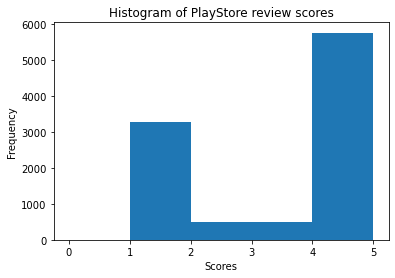

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleanedonly = df_cleanedonly.sort_values('Score')

# create a list of bin edges
bins = [0, 1.0, 2.0, 3.0, 4.0, 5.0]

# create the histogram
plt.hist(df_cleanedonly['Score'], bins=bins)


# add x-axis label and title
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of PlayStore review scores')

# show the plot
plt.show()

In [ ]:
#Find for any missing values
df_cleanedonly.isnull().sum()

Review    193
Score       0
Date        0
dtype: int64

In [ ]:
#Drop rows with empty values
df_cleanedonly.dropna(inplace=True, how='any')
df_cleanedonly.isnull().sum()

Review    0
Score     0
Date      0
dtype: int64

In [ ]:
df_cleanedonly.count()

Review    9807
Score     9807
Date      9807
dtype: int64

In [ ]:
# Removing reviews with non english characters
# df_cleanedonly = df_cleanedonly[df_cleanedonly.Review.map(lambda x: x.isascii())]
# df_cleanedonly.describe()
# -------------------------------------------------------------------------------------------------------------------------

# The result of the df if non-english reviews where removed.
detected_langs = np.array([detect(text) for text in df_cleanedonly['Review']])
df_english = df_cleanedonly[detected_langs == 'en']
df_english.count()

Review    4439
Score     4439
Date      4439
dtype: int64

In [ ]:
df_cleanedonly['Review'][58:68]

61                                           thank love
62    make easy book grab person another location cu...
63    app ngu b thanh ha tm ch si gn c c chp gi ch t...
64    fares expensive drivers refuse pick peak hrs h...
65    akun saya tiba dinonaktifkanpadahal sudah plat...
66    pleased service attitude grab ridecar far than...
67    cancelled booking immediately gcash charged ca...
68                                                 good
69                                             good app
70                              driver honest courteous
Name: Review, dtype: object

In [ ]:
df_english['Review'][22:32]
# Non-english reviews were removed.

61                                           thank love
62    make easy book grab person another location cu...
64    fares expensive drivers refuse pick peak hrs h...
66    pleased service attitude grab ridecar far than...
67    cancelled booking immediately gcash charged ca...
69                                             good app
73    low availability high wait time drivers making...
77             customer service terrible switching apps
84    support staff knowledgable enough tickets get ...
85            hard trasfer gcashalways failed verifying
Name: Review, dtype: object

Though it worked, almost <strong>half</strong> of our data includes reviews that is written in another language. Here, we meet a data challenge and we need to find a way to not exclude these data. Let's find a model that can do exactly that.

Initially, we were considering TextBlob to use for our sentiment analysis. However, upon encountering this language problem, we changed our minds as TextBlob is a simple library for sentiment analysis; however, it is primarily designed for English-language text and may not work well for other languages. Then, we looked at Vader Sentiment. Upon research, we found that even though Vader is primarily trained on English-language text, there were many reports of people successfully using Vader for texts in other languages, including Malay and Chinese, although the accuracy may be limited.

### Therefore, we will continue to use df_cleanedonly as our primary dataframe.

In [ ]:
df_cleanedonly.to_csv("cleaned_grab_playstore_reviews.csv",index=False)